#**Predicting Feedback on Online Food Orders Using Logistic Regression**

**MILLARE, LUCKY OWELL U.**

**BSCS -IS - 3B**

#**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#**Part 1: Data Loading and Preprocessing**

In [ ]:
df = pd.read_csv('onlinefoods.csv')
df.head()
df.isnull().sum()

# Handling missing values and encoding categorical variables
numeric_features = ['Age']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



#**Part 2: Exploratory Data Analysis (EDA)**

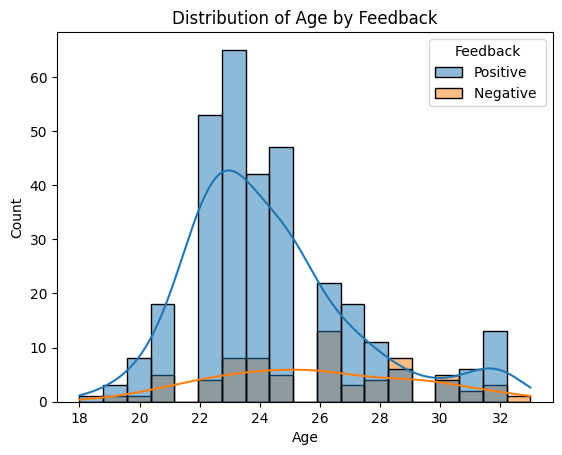

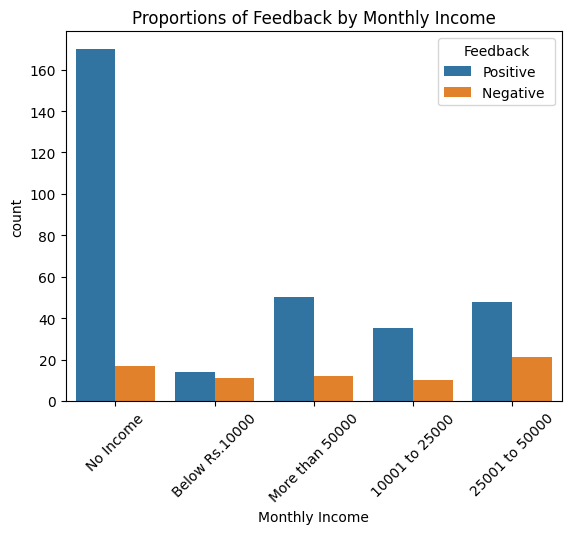

<ipython-input-91-e6dbd103889e>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


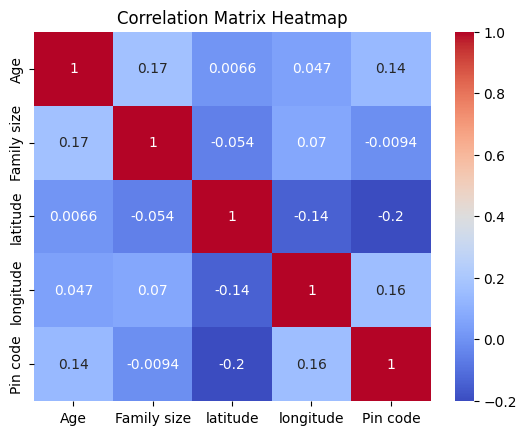

In [ ]:
df.describe()

# Distribution of Age and its impact on Feedback
sns.histplot(data=df, x='Age', hue='Feedback', kde=True)
plt.title('Distribution of Age by Feedback')
plt.show()

# Proportions of Feedback across different levels of Monthly Income
sns.countplot(data=df, x='Monthly Income', hue='Feedback')
plt.title('Proportions of Feedback by Monthly Income')
plt.xticks(rotation=45)
plt.show()

# Correlation matrix heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

#**Part 3: Logistic Regression Model**

In [ ]:
x = df.drop('Feedback', axis=1)
y = df['Feedback']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating the logistic regression pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Fitting the model
clf.fit(x_train, y_train)

# Model Evaluation
# Predictions
y_pred = clf.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{conf_matrix}')
print(f'Classification Report: \n{class_report}')


Accuracy: 0.8461538461538461
Confusion Matrix: 
[[ 0 11]
 [ 1 66]]
Classification Report: 
              precision    recall  f1-score   support

   Negative        0.00      0.00      0.00        11
    Positive       0.86      0.99      0.92        67

    accuracy                           0.85        78
   macro avg       0.43      0.49      0.46        78
weighted avg       0.74      0.85      0.79        78



# **Part 4: Data Analysis and Visualization**

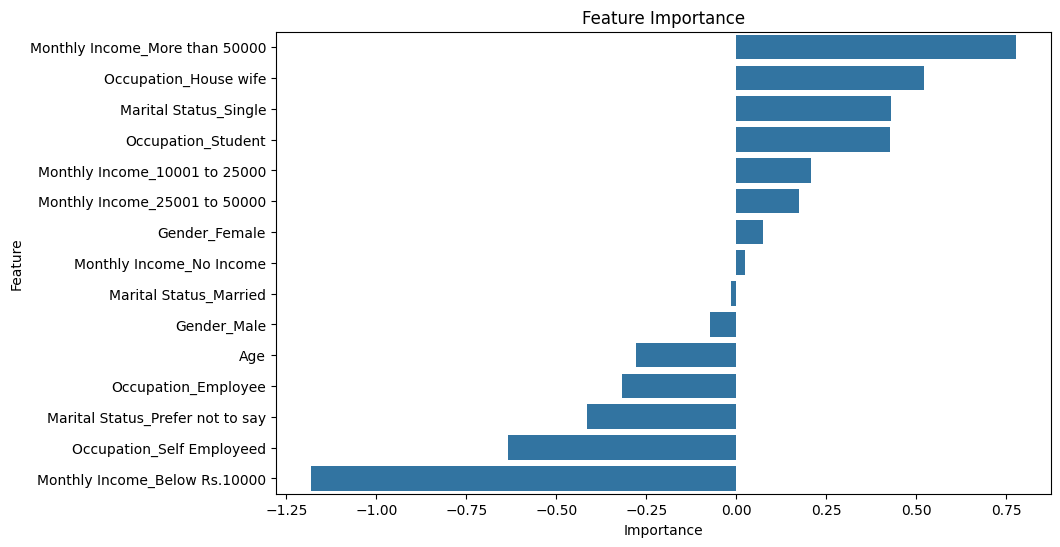

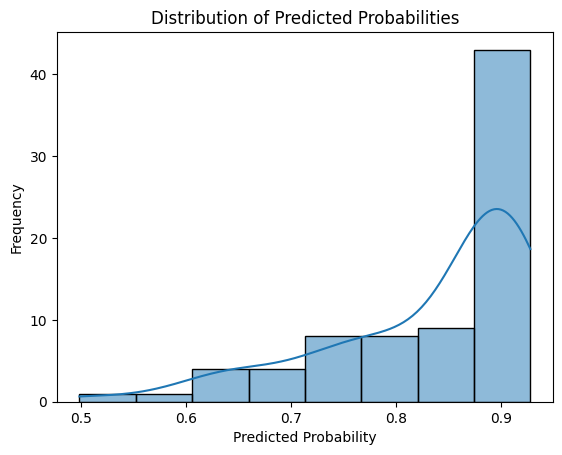

In [ ]:
# Feature Importance
encoded_cat_features = clf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']\
    .get_feature_names_out(categorical_features)
features = numeric_features + list(encoded_cat_features)
feature_importance = clf.named_steps['classifier'].coef_[0]

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Prediction Insights
y_pred_proba = clf.predict_proba(X_test)[:, 1]
sns.histplot(y_pred_proba, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()